<hr/>

# Data Mining
**Tamás Budavári** - budavari@jhu.edu <br/>

- Bayesian inference 
- Sampling from posterior

<hr/>

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [22]:
pylab.rcParams['figure.figsize'] = (16,9)

<h1><font color="darkblue">Bayesian Inference</font></h1>
<hr/>

Rev. [Thomas Bayes](https://en.wikipedia.org/wiki/Thomas_Bayes) (c.1701-1761)

<img src=https://upload.wikimedia.org/wikipedia/commons/d/d4/Thomas_Bayes.gif align=left height=200>


### Probabilitistic Models
- From data $D$ we infer the parameters $\theta$ of model $M$ 

>$\displaystyle p(\theta \lvert D,M) = \frac{p(\theta \lvert M)\ p(D \lvert \theta,M)}{p(D \lvert M)}$ 

> or

>$\displaystyle p(\theta) = \frac{\pi(\theta)\,{\cal{}L}(\theta)}{\int \pi(\theta)\,{\cal{}L}(\theta)\ d\theta }$
>
> where $\displaystyle \int \pi(\theta)\,{\cal{}L}(\theta)\ d\theta \; $ could ensure that $\displaystyle \; \int p(\theta)\,d \theta = 1$ 

- Recall [posterior](https://en.wikipedia.org/wiki/Posterior_probability), [prior](https://en.wikipedia.org/wiki/Prior_probability), [likelihood](https://en.wikipedia.org/wiki/Likelihood_function), [normalization](https://en.wikipedia.org/wiki/Normalizing_constant#Bayes'_theorem)

### Exercise: your 1st classification problem 

> Among some observed objects 1% belongs to a special type, e.g., quasars mixed with many stars. Using a classification method 99% of these special objects can be correctly selected. This method also selects 0.5% of the other types of objects erroneously.

> What is the probability of having a special type if an object is selected by the method?

> Hint: [Bayes' theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem)

#### Surprized?

> Similar analysis is needed every day...

> E.g., markers of diseases

### Likelihood Function
- A set of (conditionally) independent measurements

>$\displaystyle D = \Big\{x_i\Big\}_{i=1}^N$

- The likelihood function is a product 

>$\displaystyle {\cal L}_D(\theta) = p(D \lvert \theta) = p(\{x_i\} \lvert\,\theta) = \prod_{i=1}^N f(x_{i};\theta) = \prod_{i=1}^N \ell_{i}(\theta)$

- [Maximum Likelihood Estimation (MLE)](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation)

> E.g., Gaussians... cf. method of least squares

### Exercise: numerical intergration in 1D 

- Implement Bayes' rule to infer a constant based on $N$ (independent) measurements

>0. Assume Gaussian likelihood with $\sigma=1$ and improper prior

>0. Use function [`np.trapz(f,x)`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.trapz.html) for numerical integration

>0. Start from the code below 

```python
# Fake data points from normal distribution
data = np.random.randn(5) 

# Grid over the parameter
mu = np.linspace(-2, 2, 1000) 

# missing code here...

# Plot
plot(mu, pdf) 
xlabel('mu')
ylabel('posterior')

# Expectation value
np.trapz(mu*pdf, mu) 
```

0.19378491097080394

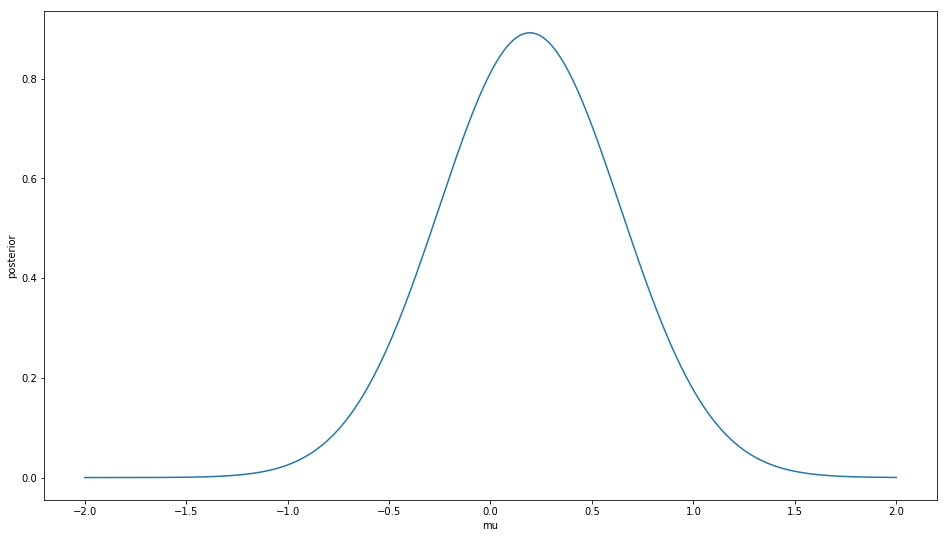

In [23]:
# Fake data points from normal distribution
data = np.random.randn(5) 

# Grid over the parameter
mu = np.linspace(-2, 2, 1000) 

# Bayes' rule with improper prior 1
lk = np.exp(-0.5*np.sum(np.square(data-mu[:,newaxis]), axis=1))
pdf = lk / np.trapz(lk, mu) 

# Plot posterior v.s. mu
plot(mu, pdf) 
xlabel('mu')
ylabel('posterior')

# Expectation value
np.trapz(mu*pdf, mu) 

### Another improper prior

Uniform but cannot be negative, e.g., temperature in Kelvin
> $
\pi(\mu) = \left\{ \begin{array}{ll}
        0 & \mbox{if $\mu < 0$} \\
        1 & \mbox{if $\mu \geq 0$} 
\end{array}\right. 
$


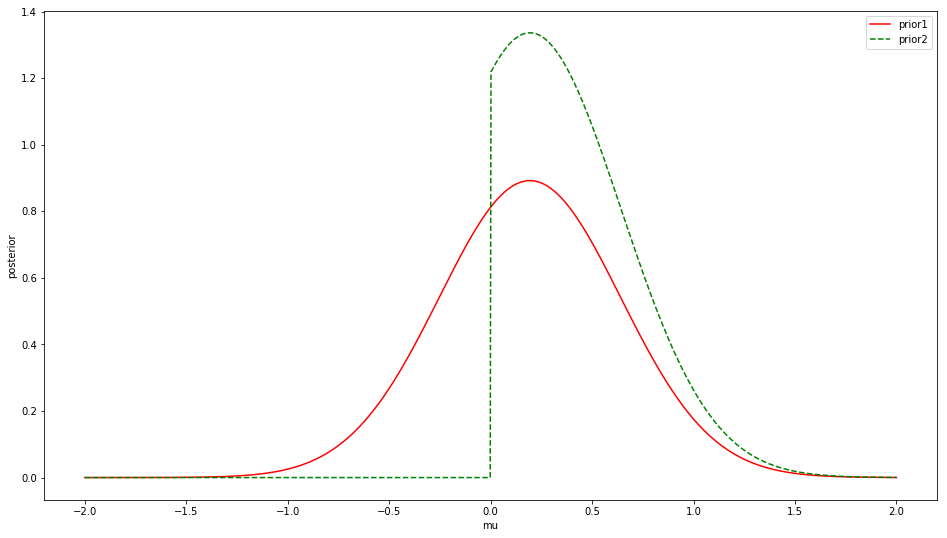

In [24]:
# Define prior
prior = np.ones_like(lk)
prior[mu < 0] = 0

# Calculte posterior
numerator = prior * lk
pdf0 = numerator / np.trapz(numerator, mu)

# Plot posterior v.s. mu grouped by different prior
plot(mu, pdf,'r')
plot(mu, pdf0,'g--') 
xlabel('mu')
ylabel('posterior')
legend(['prior1', 'prior2']);

### Normal prior

- Compare with previous results for different $\sigma$ values, i.e., `scale`

In [20]:
from scipy.stats import norm as gauss

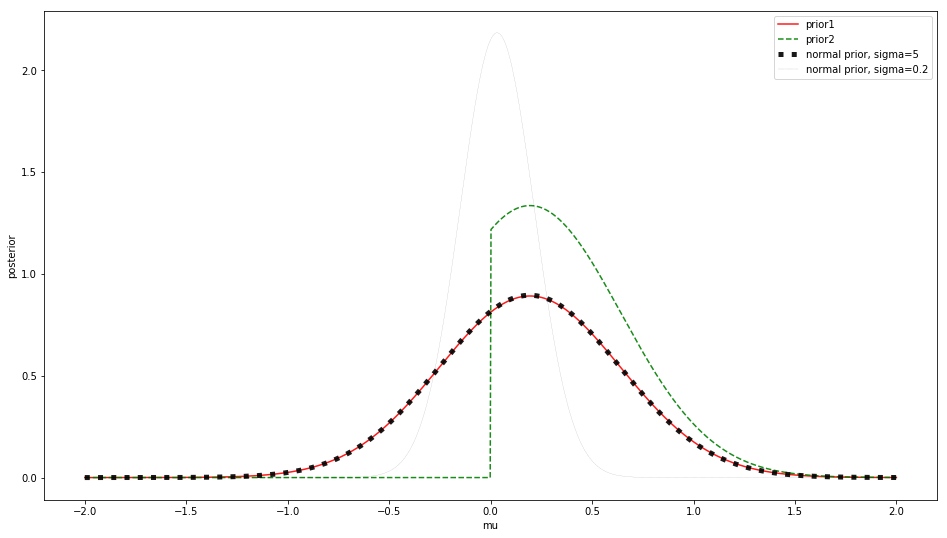

In [28]:
# Plot posterior v.s. mu grouped by different prior we have above
plot(mu, pdf, 'r', alpha=0.9)
plot(mu, pdf0,'g--', alpha=0.9) 

# Use normal prior with different sigma
for s in [5, 0.2]:
    numerator = lk * gauss.pdf(mu, scale=s)
    pdfG = numerator / np.trapz(numerator, mu)
    plot(mu, pdfG, 'k:', lw=s, alpha=0.9)
    
xlabel('mu')
ylabel('posterior')
legend(['prior1', 'prior2', 'normal prior, sigma=5', 'normal prior, sigma=0.2']);

### Multiple Datasets

- If the data set $D$ consists of two subsets of $D_1$ and $D_2$, we can consider them together or separately

>$\displaystyle p(\theta \lvert D_1,D_2) = \frac{p(\theta)\, p(D_1, D_2 \lvert \theta)}{p(D_1, D_2)}$

> also 


>$\displaystyle p(\theta \lvert D_1, D_2) = \frac{p(\theta \lvert D_1)\, p(D_2 \lvert \theta, D_1)}{p(D_2 \lvert D_1)}$

- Because

>$\displaystyle p(\theta \lvert D) = p(\theta \lvert \color{green}{D_1}, \color{red}{D_2}) = \frac{p(\theta \lvert \color{green}{D_1})\, p(\color{red}{D_2} \lvert \theta, \color{green}{D_1})}{p(\color{red}{D_2} \lvert \color{green}{D_1})}$
>$\displaystyle = \frac{p(\theta)\,p(\color{green}{D_1} \lvert \theta)\, p(\color{red}{D_2} \lvert \theta, \color{green}{D_1})}{p(\color{green}{D_1})\,p(\color{red}{D_2} \lvert \color{green}{D_1})}$
>$\displaystyle = \frac{p(\theta)\,p(\color{green}{D_1},\color{red}{D_2} \lvert \theta)}{p(\color{green}{D_1}, \color{red}{D_2})}$
>$\displaystyle = \frac{p(\theta)\,p(D \lvert \theta)}{p(D)}$

- Incremental learning


>$\displaystyle D = \big\{ \color{green}{D_1},\ \color{red}{D_2},\ \color{darkblue}{D_3}, \dots, \color{black}{D_N} \big\}$

### Characterization of Posterior PDF

- Mode, Mean, Covariance, etc... For example,

>$ \displaystyle \bar{\theta} = \int {\color{default}\theta}\ p(\theta)\ d\theta$
>$ \displaystyle =  \frac{\int \theta\,\pi(\theta)\,{\cal{}L}(\theta)\,d\theta}{\int \pi(\theta)\,{\cal{}L}(\theta)\,d\theta }$
>
> Recall [that](#Probabilitistic-Models)
>
>$\displaystyle p(\theta) = \frac{\pi(\theta)\,{\cal{}L}(\theta)}{\int \pi(\theta)\,{\cal{}L}(\theta)\ d\theta }$



- In general, numerical evaluation is required 

> Randomized algorithms;
> Sampling from distributions




### Caution!

- Noisy likelihood function with false peak(s)
 
> Misleading MLE by an erroneous spike?
 
- Mean could be completely off

> E.g., center of a ring 

### Sampling 

- How to calculate an integral such as

>$ \displaystyle \langle f(\theta)\rangle  =  \int f(\theta)\,p(\theta)\,d\theta $

- Approximation using $\{\theta_i\}$ sample from $p(\cdot)$

>$ \displaystyle \langle f(\theta)\rangle \approx \frac{1}{n}\sum_{i=1}^{n} f(\theta_i) $

- But we really don't know the posterior that well!

### Sampling from Prior

- Prior is better known 

> $ \displaystyle \langle f(\theta)\rangle =$
>$ \displaystyle \frac{\int f(\theta)\,\pi(\theta)\,{\cal{}L}(\theta)\,d\theta}{\int \pi(\theta)\,{\cal{}L}(\theta)\,d\theta }$
>
> Recall [that](#Probabilitistic-Models)
>
>$\displaystyle p(\theta) = \frac{\pi(\theta)\,{\cal{}L}(\theta)}{\int \pi(\theta)\,{\cal{}L}(\theta)\ d\theta }$


- Approximation using $\{\theta_i\}$ sample from $\pi(\cdot)$

>$ \displaystyle \langle f(\theta)\rangle \approx \frac{\sum f(\theta_i)\,{\cal{}L}(\theta_i)}{\sum {\cal{}L}(\theta_i)} $

### Sampling from ...

- E.g., likelihood?

>$ \displaystyle \langle f(\theta)\rangle \approx \frac{\sum f(\theta_i)\,\pi(\theta_i)}{\sum \pi(\theta_i)} $

- What about something "similar"?

### [Importance Sampling](https://en.wikipedia.org/wiki/Importance_sampling)

- We usually have integrals such as

>$ \displaystyle \langle f(\theta)\rangle = \int f(\theta)\,g(\theta)\,d\theta$

- If we can't sample from $g(\cdot)$ but can from a $h(\cdot)$ 

> s.t. $\ \ \ g(\theta) \leq K \cdot h(\theta) \ \ \ $ for any $\theta$ and a suitably large $K$

>$\displaystyle \langle f(\theta)\rangle \approx \frac{1}{n} \sum_i^n f(\theta_i)\,\frac{g(\theta_i)}{h(\theta_i)}$

### Unhomework

- Try different priors in the numerical inference example! 

> Does the result change? 

> How about with more or fewer measurements?

- Implement the example using different integration techniques

> Sample from prior density function or likelihood function to derive the expectation value and variance

<h1><font color="darkblue">scikit-learn in Python (Continued)</font></h1>
<hr/>

### [Tutorial](http://scikit-learn.org/stable/tutorial/index.html)

- <font color="red">**NOTE**: </font> Again it is always a good practice to try to implement the methods you learnt yourself, which could also help you understand how different methods could work and custmize it based on the real problems you want to solve. But you might also want to be familar enough with `scikit-learn` in `Python`, which could be a powerful tool for data-mining/machine-learning. For example, you could use `scikit-learn` to check the output of your own codes or to implement and compare results of different methods quickly.

### [Preprocessing](http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing)

In [1]:
from sklearn import preprocessing

- **Standardization**

In [5]:
# Generate data
np.random.seed(2019)
X = np.random.rand(20, 3)
X

array([[ 0.90348221,  0.39308051,  0.62396996],
       [ 0.6378774 ,  0.88049907,  0.29917202],
       [ 0.70219827,  0.90320616,  0.88138193],
       [ 0.4057498 ,  0.45244662,  0.26707032],
       [ 0.16286487,  0.8892147 ,  0.14847623],
       [ 0.98472349,  0.03236122,  0.51535075],
       [ 0.20112905,  0.88601087,  0.51361992],
       [ 0.57830159,  0.29928265,  0.8371974 ],
       [ 0.52664983,  0.10484424,  0.27812941],
       [ 0.04659494,  0.50907615,  0.47242629],
       [ 0.90448733,  0.94349222,  0.70339235],
       [ 0.84629795,  0.92799464,  0.81936188],
       [ 0.84518556,  0.79145187,  0.17100016],
       [ 0.28997792,  0.30448392,  0.1476601 ],
       [ 0.57381853,  0.86355701,  0.32329947],
       [ 0.27564943,  0.68218738,  0.19140631],
       [ 0.58102448,  0.86255827,  0.23452664],
       [ 0.28985187,  0.38285364,  0.34960393],
       [ 0.32879374,  0.94017484,  0.0380261 ],
       [ 0.77684511,  0.38464466,  0.71672375]])

In [6]:
# Standardization
X_scaled = preprocessing.scale(X, axis=0, with_mean=True, with_std=True, copy=True)

In [7]:
# Check whether mean = 0
X_scaled.mean(axis=0)

array([ -1.16573418e-16,  -2.38697950e-16,  -4.77395901e-16])

In [8]:
# Check whether std = 1
X_scaled.std(axis=0)

array([ 1.,  1.,  1.])

- **Binarization**

In [9]:
# Generate data
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])
X

array([[ 1., -1.,  2.],
       [ 2.,  0.,  0.],
       [ 0.,  1., -1.]])

In [10]:
# Use 0 as threshold
binarizer = preprocessing.Binarizer(threshold=0.0, copy=True)
binarizer.transform(X)

array([[ 1.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.]])

In [11]:
# Use 1.5 as threshold
binarizer = preprocessing.Binarizer(threshold=1.5, copy=True)
binarizer.transform(X)

array([[ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  0.]])

- **Custom transformers**

In [12]:
# Generate data
X = np.array([[0, 1], [2, 3]])
X

array([[0, 1],
       [2, 3]])

In [13]:
# Could be useful in pipeline
transformer = preprocessing.FunctionTransformer(np.log1p) # log(1 + x)
transformer.transform(X)

array([[ 0.        ,  0.69314718],
       [ 1.09861229,  1.38629436]])

In [14]:
np.log1p(X)

array([[ 0.        ,  0.69314718],
       [ 1.09861229,  1.38629436]])